# BISMILLAH SING BEUNGHAR

## Convention

- Naming variable with ***snake_case***
- Use **Type Declaration** for every variables and functions
- **Zero** use of comments *(unless necessary)*
- Always write long arguments of a function with **newline**

In [10]:
definition: dict = {
    'ID_Transaction': 'Unique identifier for each transaction or event.',
    'temperature': 'Maximum temperature recorded over the last 10 hours in degrees Celsius.',
    'temperature_min': 'Minimum temperature recorded over the last 10 hours in degrees Celsius.',
    'temperature-1': 'Recorded temperature value from sensor 1 (unit: °C).',
    'temperature-2': 'Recorded temperature value from sensor 2 (unit: °C).',
    'temperature-3': 'Recorded temperature value from sensor 3 (unit: °C).',
    'apparent_temperature_max': 'Maximum perceived or "feels-like" temperature (unit: °C).',
    'apparent_temperature_min': 'Minimum perceived or "feels-like" temperature (unit: °C).',
    'ID_Area': 'Identifier for the specific area or region.',
    'Machine': 'Identifier or name of the machine involved in the event.',
    'timestamp': 'Timestamp of the recorded event or transaction.',
    'humidity': 'Recorded humidity level (percentage).',
    'Voltage-L': 'Voltage recorded on line L (unit: volts).',
    'Voltage-R': 'Voltage recorded on line R (unit: volts).',
    'Voltage-M': 'Voltage recorded on line M (unit: volts).',
    'Current-M': 'Current recorded on line M (unit: amperes).',
    'Current-R': 'Current recorded on line R (unit: amperes).',
    'Current-T': 'Current recorded on line T (unit: amperes).',
    'RPM': 'Rotations per minute of the primary system or component.',
    'RPM-1': 'Rotations per minute recorded by sensor 1.',
    'RPM-2': 'Rotations per minute recorded by sensor 2.',
    'RPM-3': 'Rotations per minute recorded by sensor 3.',
    'Vibration-1': 'Vibration intensity recorded by sensor 1 (unit: mm/s or m/s²).',
    'Vibration-2': 'Vibration intensity recorded by sensor 2 (unit: mm/s or m/s²).',
    'Power': 'Power consumption or output of the system (unit: watts).',
    'Power_Backup': 'Indicates whether the backup power system was utilized (Yes/No).',
    'Status': 'Operational status of the machine, indicating whether it is in "Breakdown" or "Normal" condition.',
    'Breakdown_Category': 'Specific category or cause of breakdown.',
    "Mesin": "Name or description of the machine.",
    "Country Machine": "Country from which the machine was imported.",
    "ID_Area": "Identifier for the area or region where the machine is located.",
    "Last Maintenance": "Date of the most recent maintenance performed on the machine.",
    "Status Sparepart": "Availability of spare parts for the machine (e.g., Available, Not Available).",
    "Age": "Age of the machine in years (or other relevant unit)."
}


## Importing Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
pd.set_option('display.max_columns', None)

## Importing Datasets

In [30]:
train_df        : pd.DataFrame = pd.read_csv("dataset/train.csv", nrows=10000)
machine_area_df : pd.DataFrame = pd.read_csv("dataset/Machine-Area.csv")
machine_list_df : pd.DataFrame = pd.read_csv("dataset/Machine-List.csv")
area_list_df    : pd.DataFrame = pd.read_csv("dataset/Area-List.csv")

In [5]:
train_df.dtypes.sort_values()

Voltage-R                   float64
RPM-1                       float64
RPM                         float64
Current-T                   float64
Current-R                   float64
Current-M                   float64
Voltage-M                   float64
Vibration-1                 float64
Voltage-L                   float64
humidity                    float64
Vibration-2                 float64
Power                       float64
apparent_temperature_min    float64
apparent_temperature_max    float64
temperature-3               float64
temperature-2               float64
temperature-1               float64
temperature_10H_min (°C)    float64
temperature_10H_max (°C)    float64
RPM-2                       float64
RPM-3                       float64
Power_Backup                 object
ID_Transaction               object
timestamp                    object
Machine                      object
ID_Area                      object
Status                       object
Breakdown Category          

In [32]:
machine_list_df.dtypes.sort_values()

ID_Mesin           object
Mesin              object
Country Machine    object
dtype: object

In [13]:
machine_area_df.dtypes.sort_values()

Age                  int64
ID_Mesin            object
Mesin               object
Country Machine     object
ID_Area             object
Last Maintenance    object
Status Sparepart    object
dtype: object

In [14]:
area_list_df.dtypes.sort_values()

ID_Area     object
Area        object
Priority    object
dtype: object

## Data Distribution

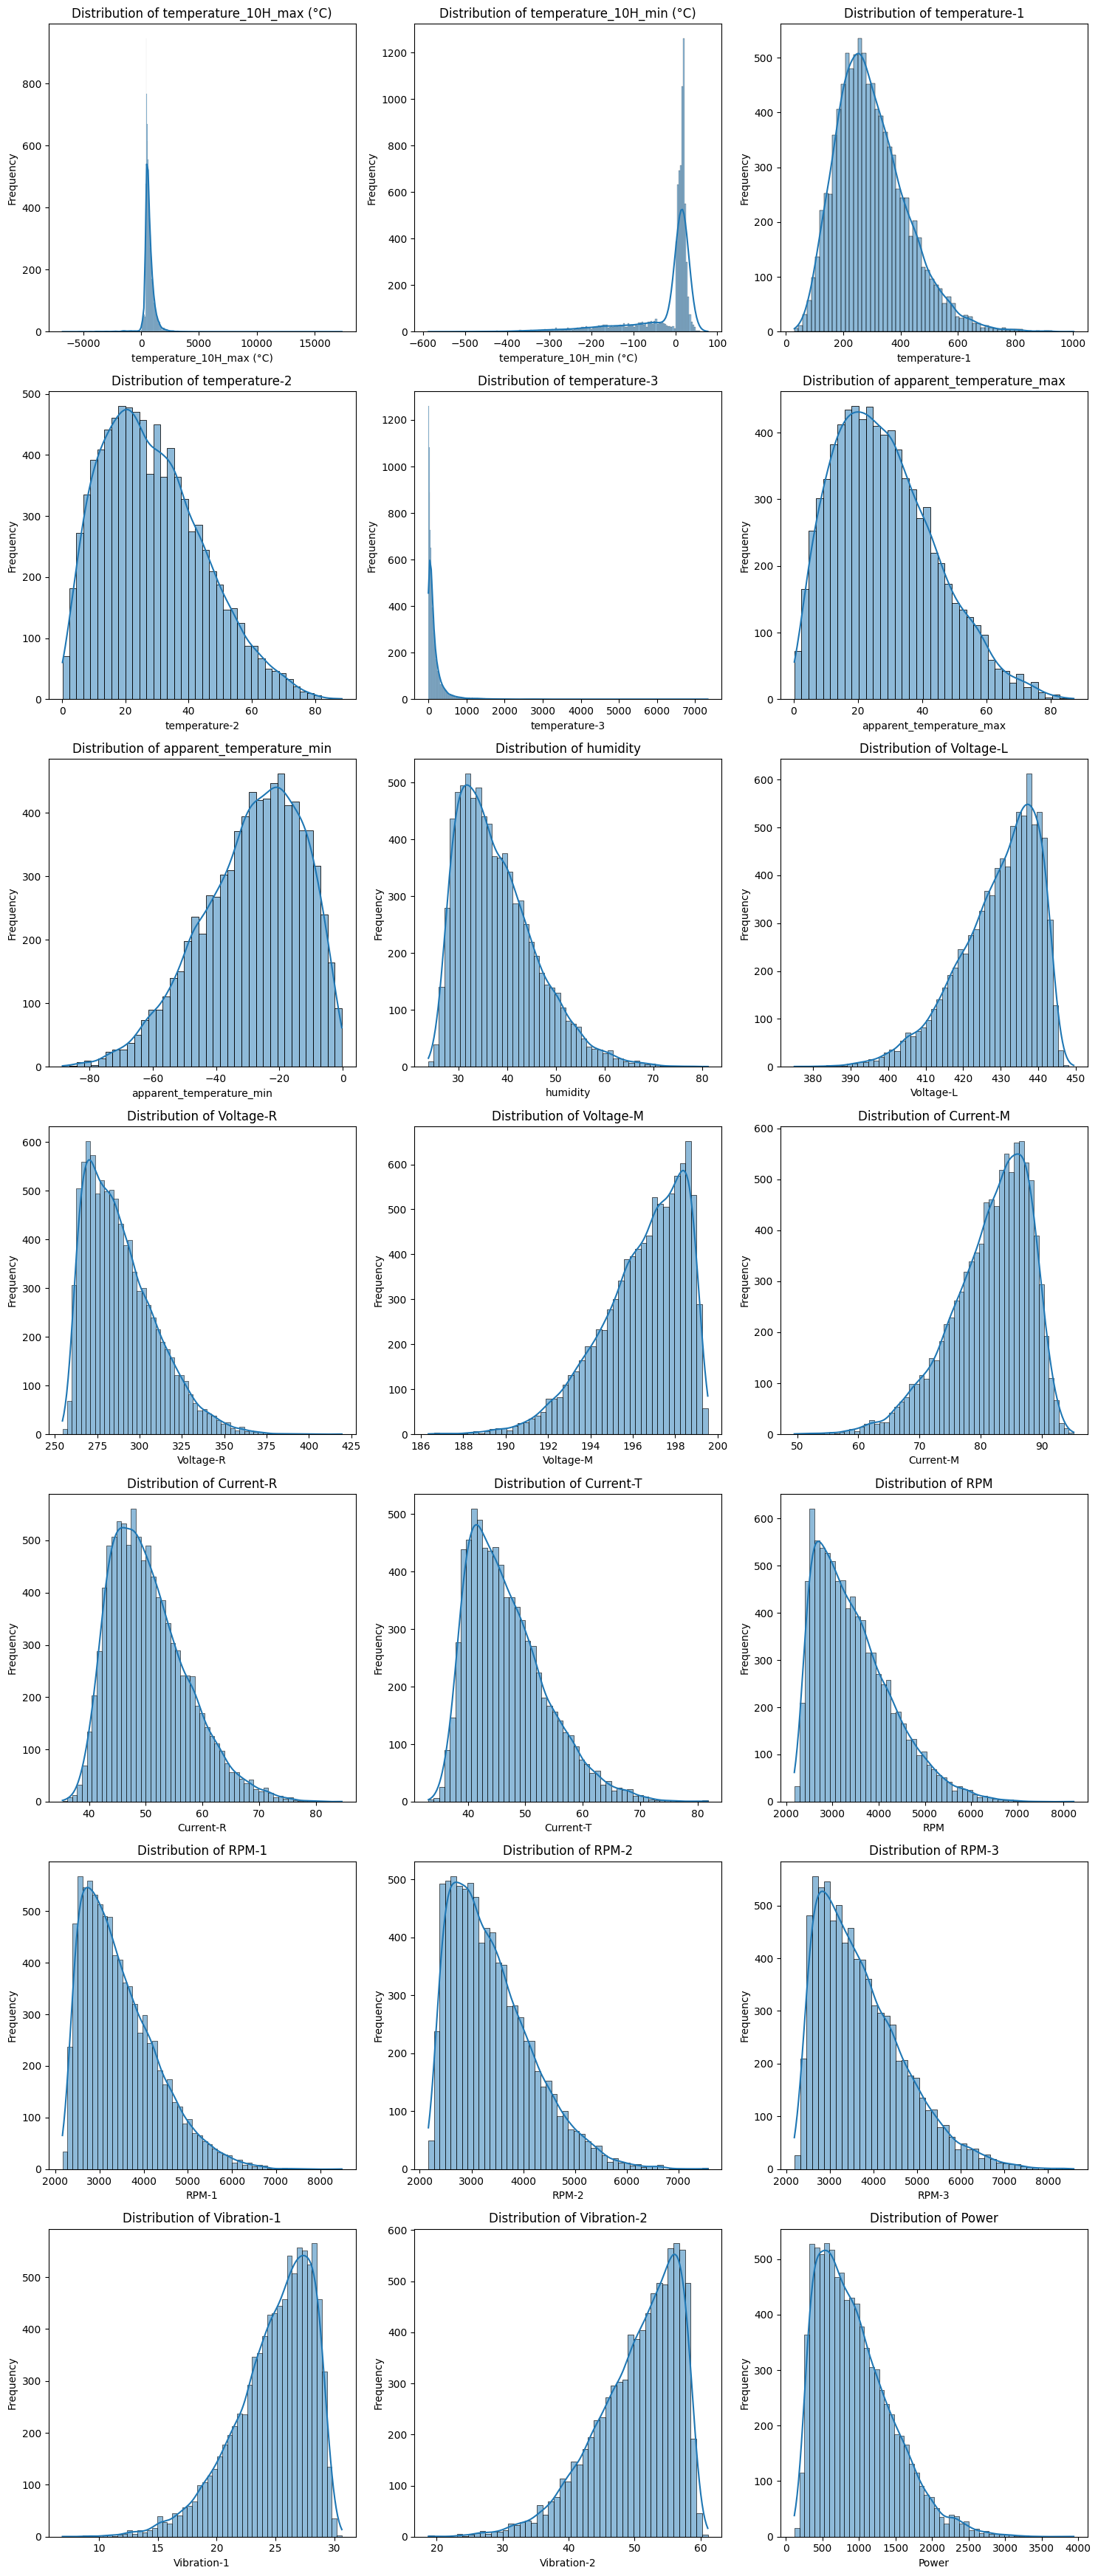

In [21]:
numeric_columns = train_df.select_dtypes(include="number").columns
n_cols = len(numeric_columns)
n_rows = np.ceil(n_cols / 3).astype(int)
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.histplot(train_df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

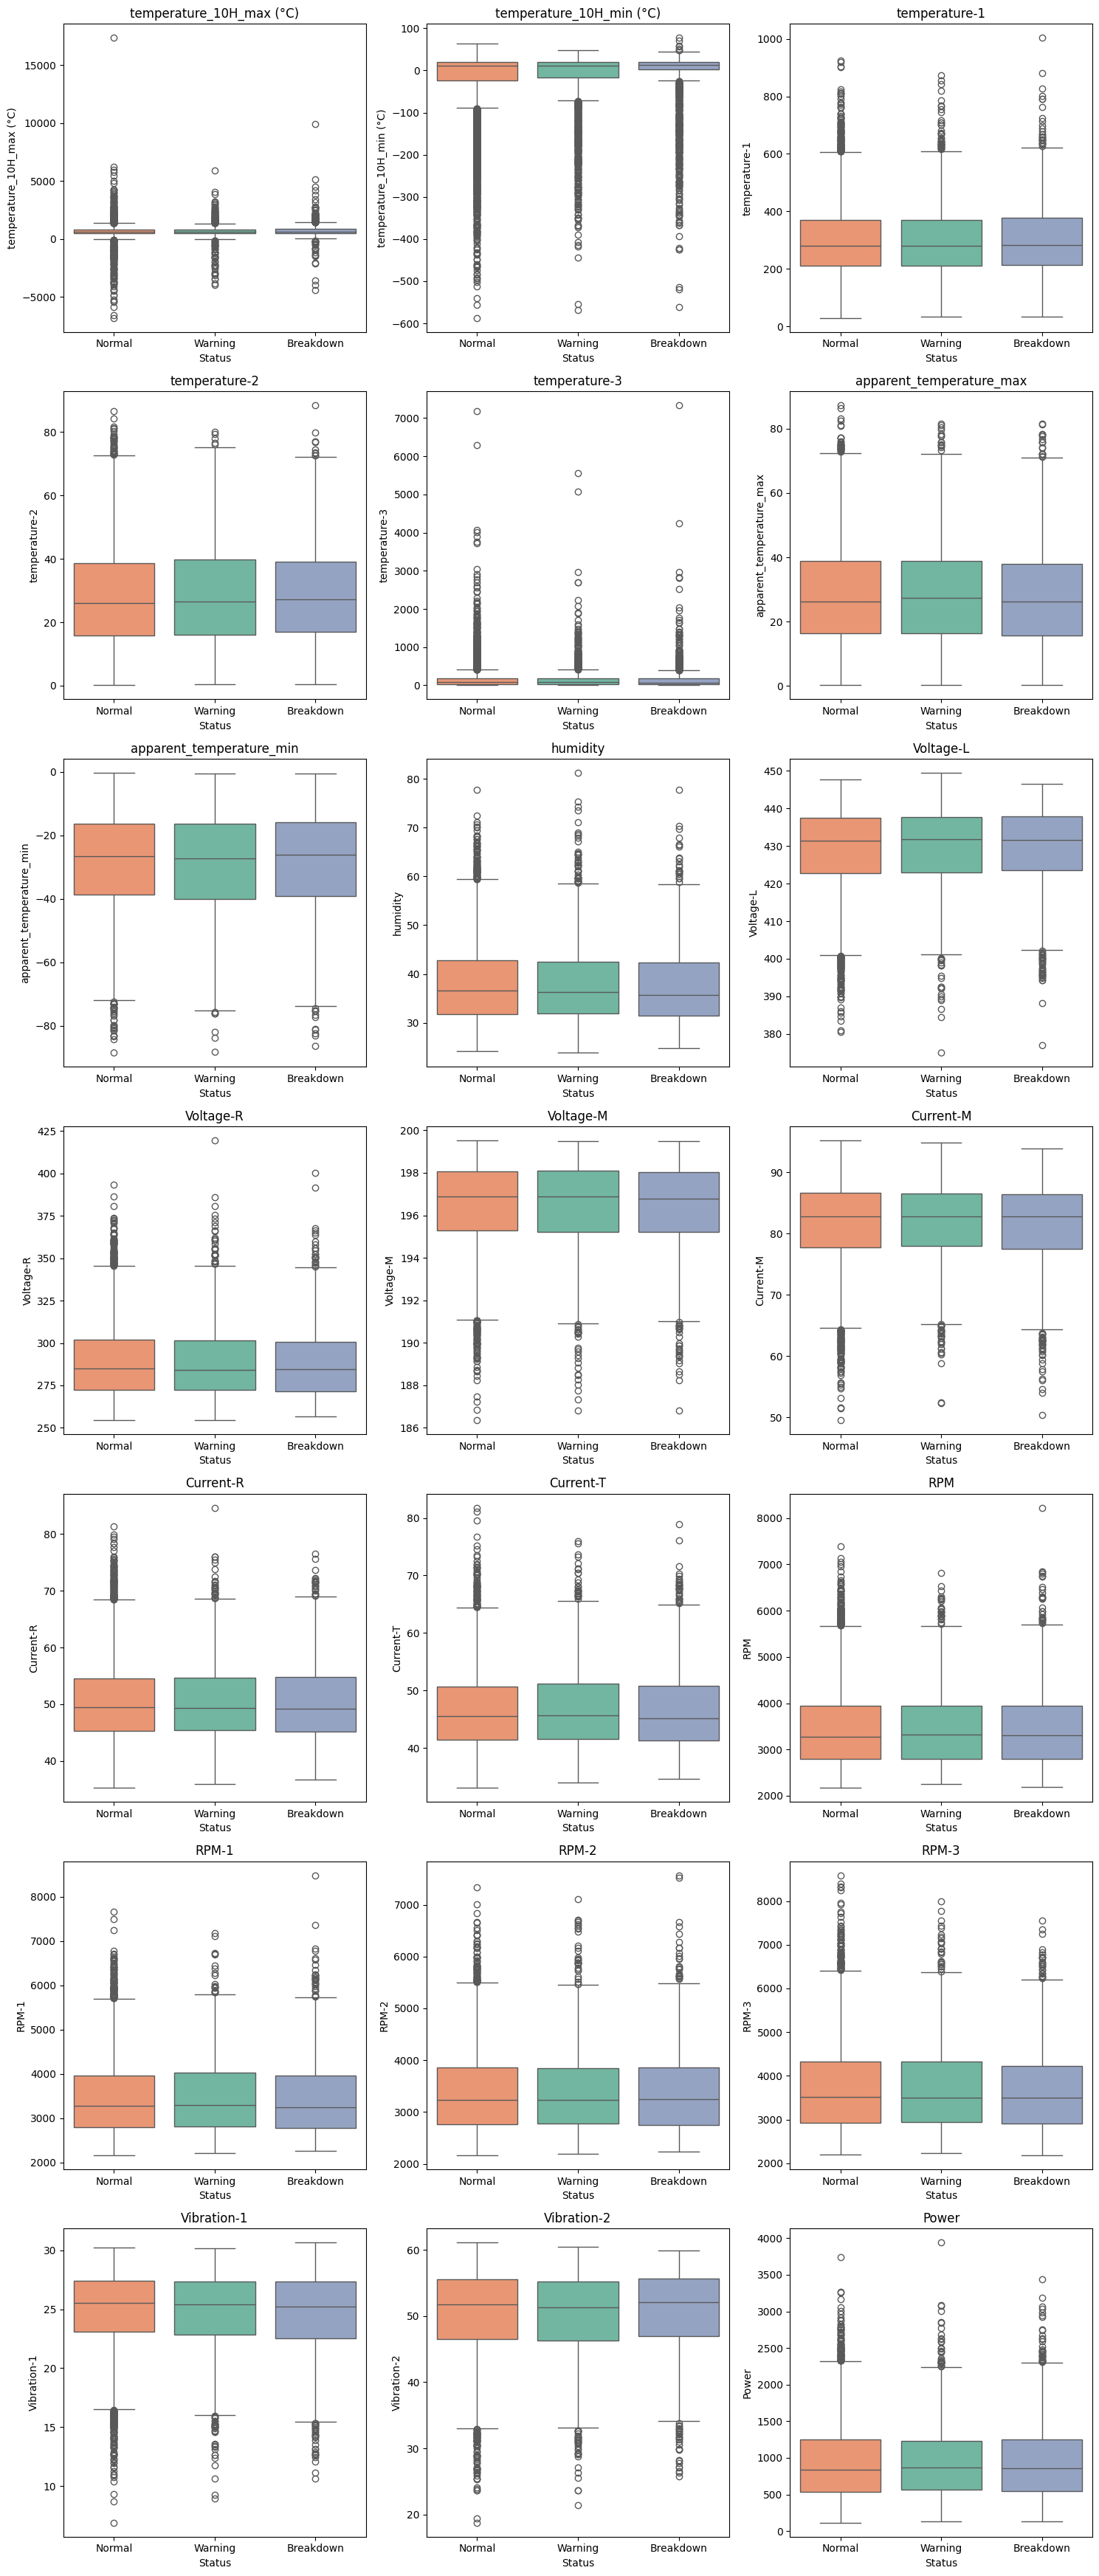

In [33]:
numeric_columns = train_df.select_dtypes(include="number").columns

n_cols = len(numeric_columns)
n_rows = np.ceil(n_cols / 3).astype(int)

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))

axes = axes.flatten()

status_order = ['Normal', 'Warning', 'Breakdown']

for i, col in enumerate(numeric_columns):
    sns.boxplot(x='Status', y=col, data=train_df, ax=axes[i], hue='Status', palette="Set2", legend=False, order=status_order)
    axes[i].set_title(col)
    axes[i].set_xlabel('Status')
    axes[i].set_ylabel(col)

plt.tight_layout()

plt.show()

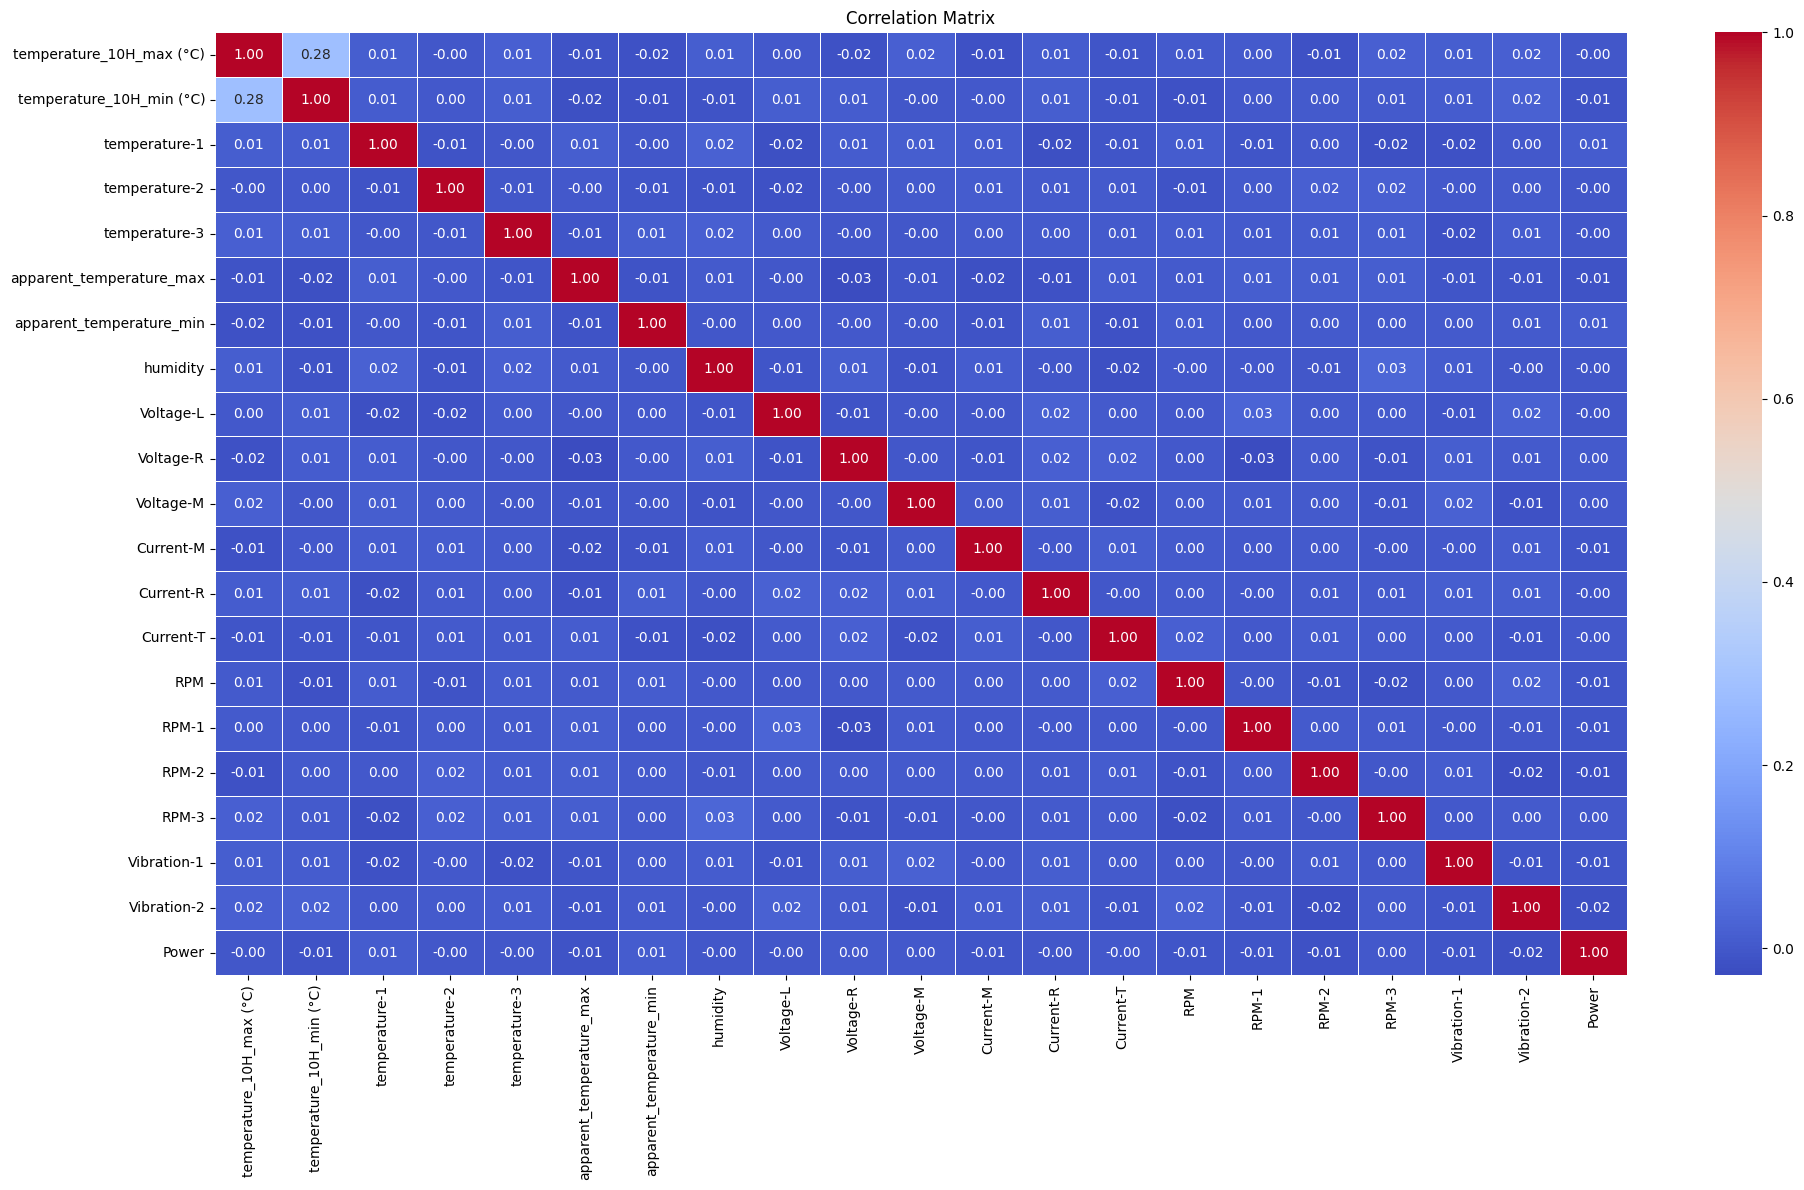

In [42]:
corr_matrix = train_df[numeric_columns].corr()

plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


## Specific Questions

### Are all the `ID_Area` values in `Machine-List.csv` are also in `Area-List.csv` ?

**Answer = `Yes`**

In [46]:
machine_area_df['ID_Area'].isin(area_list_df['ID_Area']).value_counts()

ID_Area
True    1200
Name: count, dtype: int64

### Are all the `ID_Mesin` values in `Machine-List.csv` are also in `Machine-Area.csv` ?

**Answer = `Yes`**

In [50]:
machine_area_df['ID_Mesin'].isin(machine_list_df['ID_Mesin']).value_counts()

ID_Mesin
True    1200
Name: count, dtype: int64

### Are the `ID_Area` and `ID_Mesin` dependant to each other ?

Answer = `No`

In [65]:
machine_area_df[['ID_Area', 'ID_Mesin']].value_counts().sort_values(ascending=False).head(5)

ID_Area  ID_Mesin
ID28     H.1         2
ID38     E.2         2
ID20     I.4         2
ID9      K.1         2
ID21     B.4         2
Name: count, dtype: int64

In [66]:
machine_area_df[['ID_Mesin', 'ID_Area']].value_counts().sort_values(ascending=False).head(5)

ID_Mesin  ID_Area
F.3       ID14       2
I.2       ID4        2
C.3       ID3        2
A.4       ID24       2
K.4       ID8        2
Name: count, dtype: int64

### Is `Mesin` unique to `ID_Mesin` in `Machine-List.csv` ?

Answer = `Yes`

In [76]:
machine_list_df[["Mesin", "ID_Mesin"]].value_counts().sort_values(ascending=False)

Mesin                   ID_Mesin
Bowl Cutter             F.3         1
Forklift                E.4         1
NL3                     C.1         1
Formax                  E.3         1
Hitech-1                D.1         1
Hiwell                  D.3         1
Innotech-1              E.2         1
Jawfeng                 C.3         1
Mixer Xiaojin           I.1         1
NL1                     A.1         1
NL2                     B.1         1
Novamax                 B.4         1
Plate Fomer Komori      G.1         1
Palette Jack            D.4         1
Palletizer              F.4         1
Palletizer-2            G.4         1
Palletizer-3            H.4         1
Palletizer-4            I.4         1
Palletizer-5            J.4         1
Palletizer-6            K.4         1
Plate Fomer Heidelberg  F.1         1
Plate Fomer Revo        H.1         1
Plate Fomer Stork       E.1         1
Risco-TR130             F.2         1
Stuffer Linker 2        K.1         1
Risco-TR200      